## BANK MARKETING: Predicting Whether The Customer Will Subscribe To Term Deposit (FIXED DEPOSIT) or not.
    
### Business Use Case

There has been a revenue decline for a Portuguese bank and they would like to know what actions to take. After investigation, they found out that the root cause is that their clients are not depositing as frequently as before. Knowing that term deposits allow banks to hold onto a deposit for a specific amount of time, so banks can invest in higher gain financial products to make a profit. In addition, banks also hold better chance to persuade term deposit clients into buying other products such as funds or insurance to further increase their revenues. As a result, the Portuguese bank would like to identify existing clients that have higher chance to subscribe for a term deposit and focus marketing efforts on such clients.

### Project Description

Your client is a retail banking institution. Term deposits are a major source of income for a bank. A term deposit is a cash investment held at a financial institution. Your money is invested for an agreed rate of interest over a fixed amount of time, or term. The bank has various outreach plans to sell term deposits to their customers such as email marketing, advertisements, telephonic marketing and digital marketing. Telephonic marketing campaigns still remain one of the most effective way to reach out to people. However, they require huge investment as large call centers are hired to actually execute these campaigns. Hence, it is crucial to identify the customers most likely to convert beforehand so that they can be specifically targeted via call.
You are provided with the client data such as : age of the client, their job type, their marital status, etc. Along with the client data, you are also provided with the information of the call such as the duration of the call, day and month of the call, etc. Given this information, your task is to predict if the client will subscribe to term deposit.
About The Dataset
The dataset is related with direct marketing campaigns (phone calls) of a Portuguese banking institution. The classification goal of this dataset is to predict if the client or the customer of polish banking institution will subscribe a term deposit product of the bank or not. 




### You are provided with following 2 files:
    
1.     train.csv : Use this dataset to train the model. This file contains all the client and call details as well as the target variable “subscribed”. You have to train your model using this file.
    
2.     test.csv : Use the trained model to predict whether a new set of clients will subscribe the term deposit.
    
 
### Dataset Attributes

###### Here is the description of all the variables:
    
•	Variable: Definition
    
•	ID: Unique client ID
    
•	age: Age of the client
    
•	job: Type of job
    
•	marital: Marital status of the client
    
•	education: Education level
    
•	default: Credit in default.
    
•	housing: Housing loan
    
•	loan: Personal loan
    
•	contact: Type of communication
    
•	month: Contact month
    
•	day_of_week: Day of week of contact
    
•	duration: Contact duration
    
•	campaign: number of contacts performed during this campaign to the client
    
•	pdays: number of days that passed by after the client was last contacted
    
•	previous: number of contacts performed before this campaign
    
•	poutcome: outcome of the previous marketing campaign
    
### Output variable (desired target):
    
•	Subscribed (target): has the client subscribed a term deposit? (YES/NO)
    



### Dataset Link-

•	https://github.com/dsrscientist/dataset5
    
•	https://raw.githubusercontent.com/dsrscientist/dataset5/main/termdeposit_train.csv
    
•	https://raw.githubusercontent.com/dsrscientist/dataset5/main/termdeposit_test.csv
    


In [1]:
# importing the required libraries
import pandas as pd 
import numpy as np 
import matplotlib.pyplot as plt 
import seaborn as sns 
import warnings
warnings.filterwarnings("ignore")

In [2]:
#importing the dataset 
dataset = pd.read_csv("termdeposit_train.csv")
print(dataset.shape)
dataset

(31647, 18)


,ID,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,subscribed
0,26110,56,admin.,married,unknown,no,1933,no,no,telephone,19,nov,44,2,-1,0,unknown,no
1,40576,31,unknown,married,secondary,no,3,no,no,cellular,20,jul,91,2,-1,0,unknown,no
2,15320,27,services,married,secondary,no,891,yes,no,cellular,18,jul,240,1,-1,0,unknown,no
3,43962,57,management,divorced,tertiary,no,3287,no,no,cellular,22,jun,867,1,84,3,success,yes
4,29842,31,technician,married,secondary,no,119,yes,no,cellular,4,feb,380,1,-1,0,unknown,no
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
31642,36483,29,management,single,tertiary,no,0,yes,no,cellular,12,may,116,2,-1,0,unknown,no
31643,40178,53,management,divorced,tertiary,no,380,no,yes,cellular,5,jun,438,2,-1,0,unknown,yes
31644,19710,32,management,single,tertiary,no,312,no,no,cellular,7,aug,37,3,-1,0,unknown,no
31645,38556,57,technician,married,secondary,no,225,yes,no,telephone,15,may,22,7,337,12,failure,no


Here we have total 18 attributes and subscribed is our target variable.

In [3]:
dataset['ID'].nunique()

31647

since the ID is unique to all we will remove that column.

In [4]:
dataset.columns

Index(['ID', 'age', 'job', 'marital', 'education', 'default', 'balance',
       'housing', 'loan', 'contact', 'day', 'month', 'duration', 'campaign',
       'pdays', 'previous', 'poutcome', 'subscribed'],
      dtype='object')

In [5]:
#Lets check the numberof unique values in each column
data = dataset.copy()
for i in data.columns:
    print("The number of unique value in ",i,":", data[i].nunique())


The number of unique value in  ID : 31647
The number of unique value in  age : 76
The number of unique value in  job : 12
The number of unique value in  marital : 3
The number of unique value in  education : 4
The number of unique value in  default : 2
The number of unique value in  balance : 6326
The number of unique value in  housing : 2
The number of unique value in  loan : 2
The number of unique value in  contact : 3
The number of unique value in  day : 31
The number of unique value in  month : 12
The number of unique value in  duration : 1454
The number of unique value in  campaign : 45
The number of unique value in  pdays : 509
The number of unique value in  previous : 38
The number of unique value in  poutcome : 4
The number of unique value in  subscribed : 2


In [6]:
data['contact'].unique()

array(['telephone', 'cellular', 'unknown'], dtype=object)

In [7]:
# checking the unique values
for i in data.columns:
    if (data[i].nunique()<5):
        print(i,":",data[i].unique())

marital : ['married' 'divorced' 'single']
education : ['unknown' 'secondary' 'tertiary' 'primary']
default : ['no' 'yes']
housing : ['no' 'yes']
loan : ['no' 'yes']
contact : ['telephone' 'cellular' 'unknown']
poutcome : ['unknown' 'success' 'failure' 'other']
subscribed : ['no' 'yes']


These are some columns which have less the 5 unique values

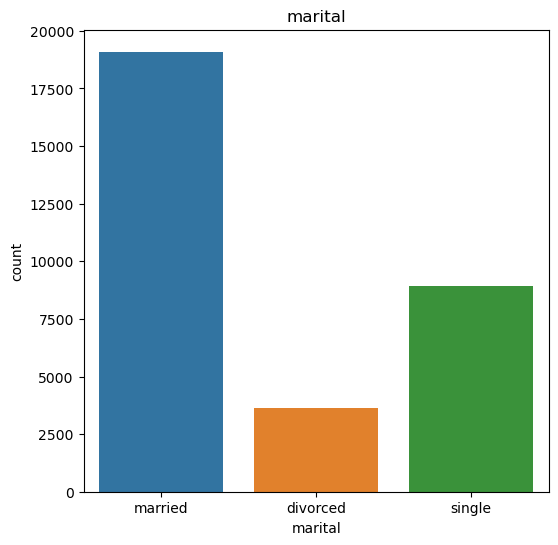

married     19095
single       8922
divorced     3630
Name: marital, dtype: int64


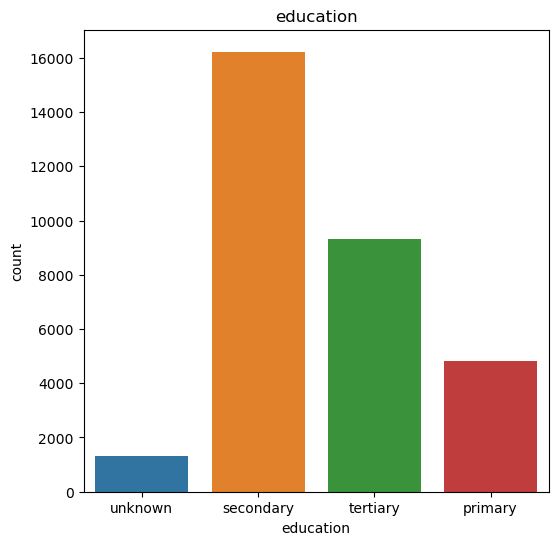

secondary    16224
tertiary      9301
primary       4808
unknown       1314
Name: education, dtype: int64


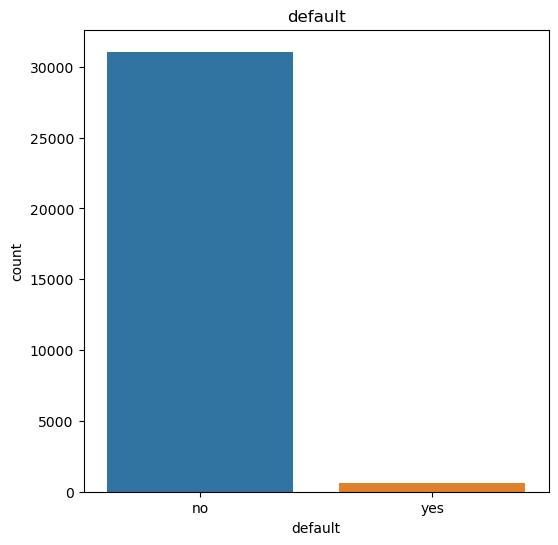

no     31062
yes      585
Name: default, dtype: int64


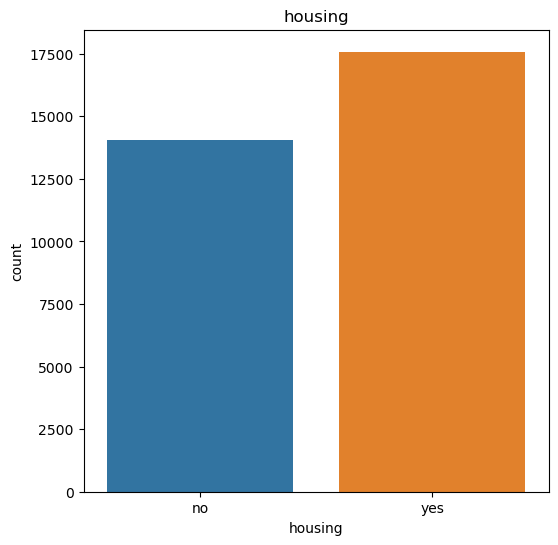

yes    17584
no     14063
Name: housing, dtype: int64


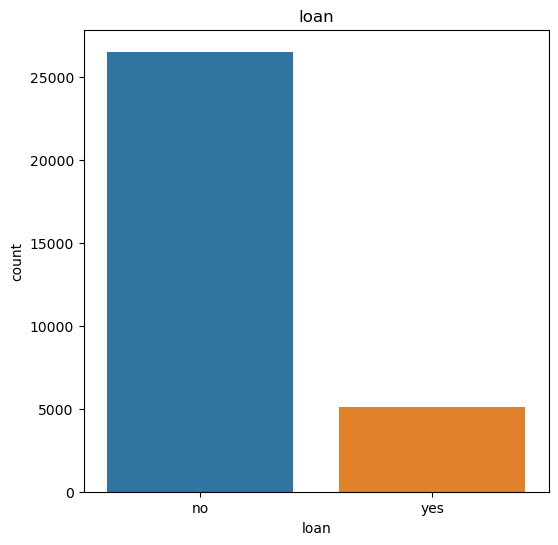

no     26516
yes     5131
Name: loan, dtype: int64


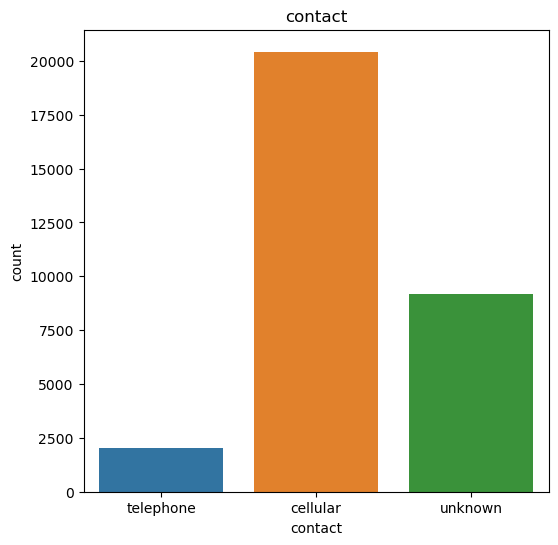

cellular     20423
unknown       9177
telephone     2047
Name: contact, dtype: int64


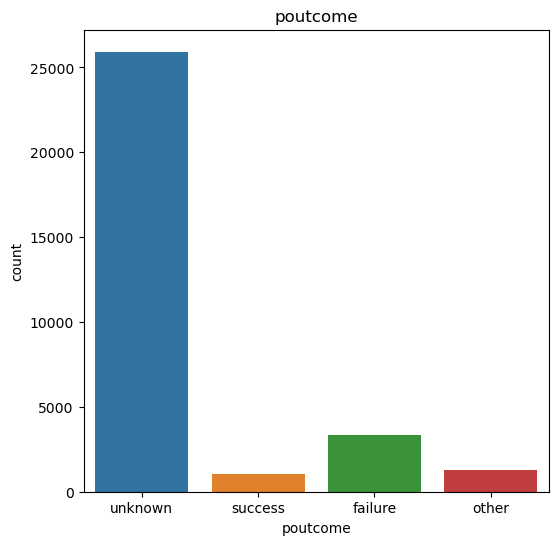

unknown    25929
failure     3362
other       1288
success     1068
Name: poutcome, dtype: int64


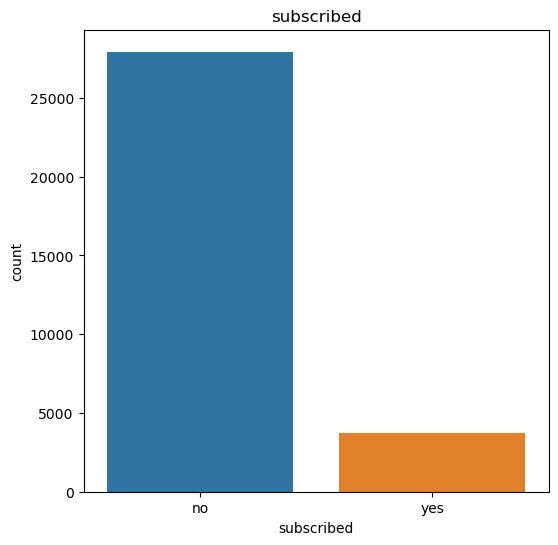

no     27932
yes     3715
Name: subscribed, dtype: int64


In [8]:
# EDA
for i in data.columns:
    if (data[i].nunique()<5):
        plt.figure(figsize=(6,6))
        sns.countplot(data[i])
        plt.title(i)
        plt.show()
        print(data[i].value_counts())


#### Observation: 
As we can see this data is imbalanced. we have to handle it.
* In the marital column we can see the number of marride people are very high
* There is a very high people with secondary education.
* Many people have Credit in default.
* The people who took the personal Loan are more as compare to the people who are not taken the personal loan.
* Very large amount of people uses celluar of contact.
* There is also huge number of unknown people who has outcome of the previous marketing campaign
* As we can see the number of non subscribers are very high as compare to the people who subscribed.

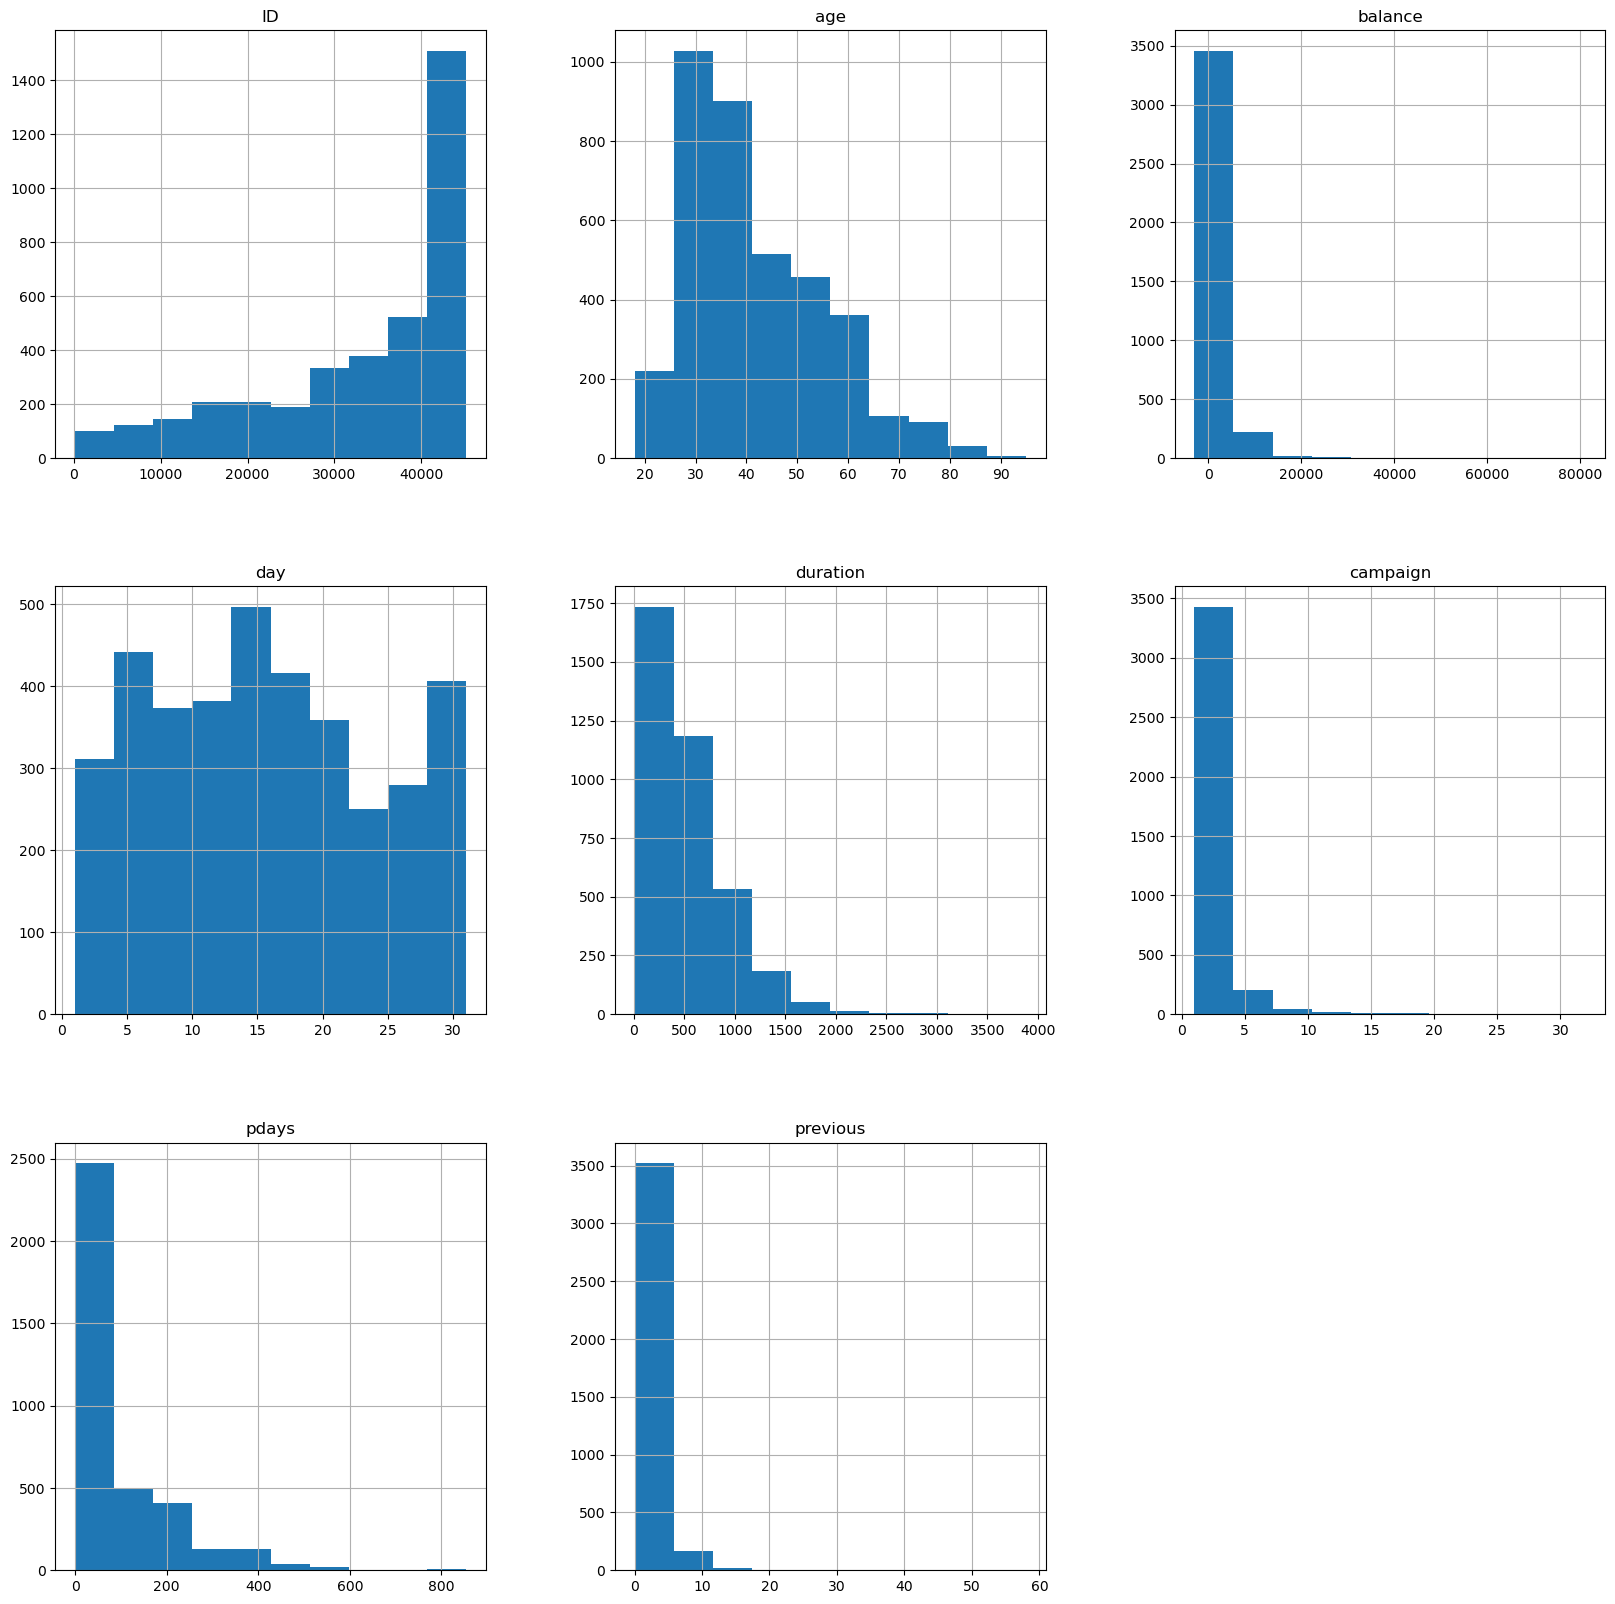

In [23]:
data[data['subscribed'] == 'yes'].hist(figsize = (20,20))
plt.title('Client has subscribed a term deposite')
plt.show()

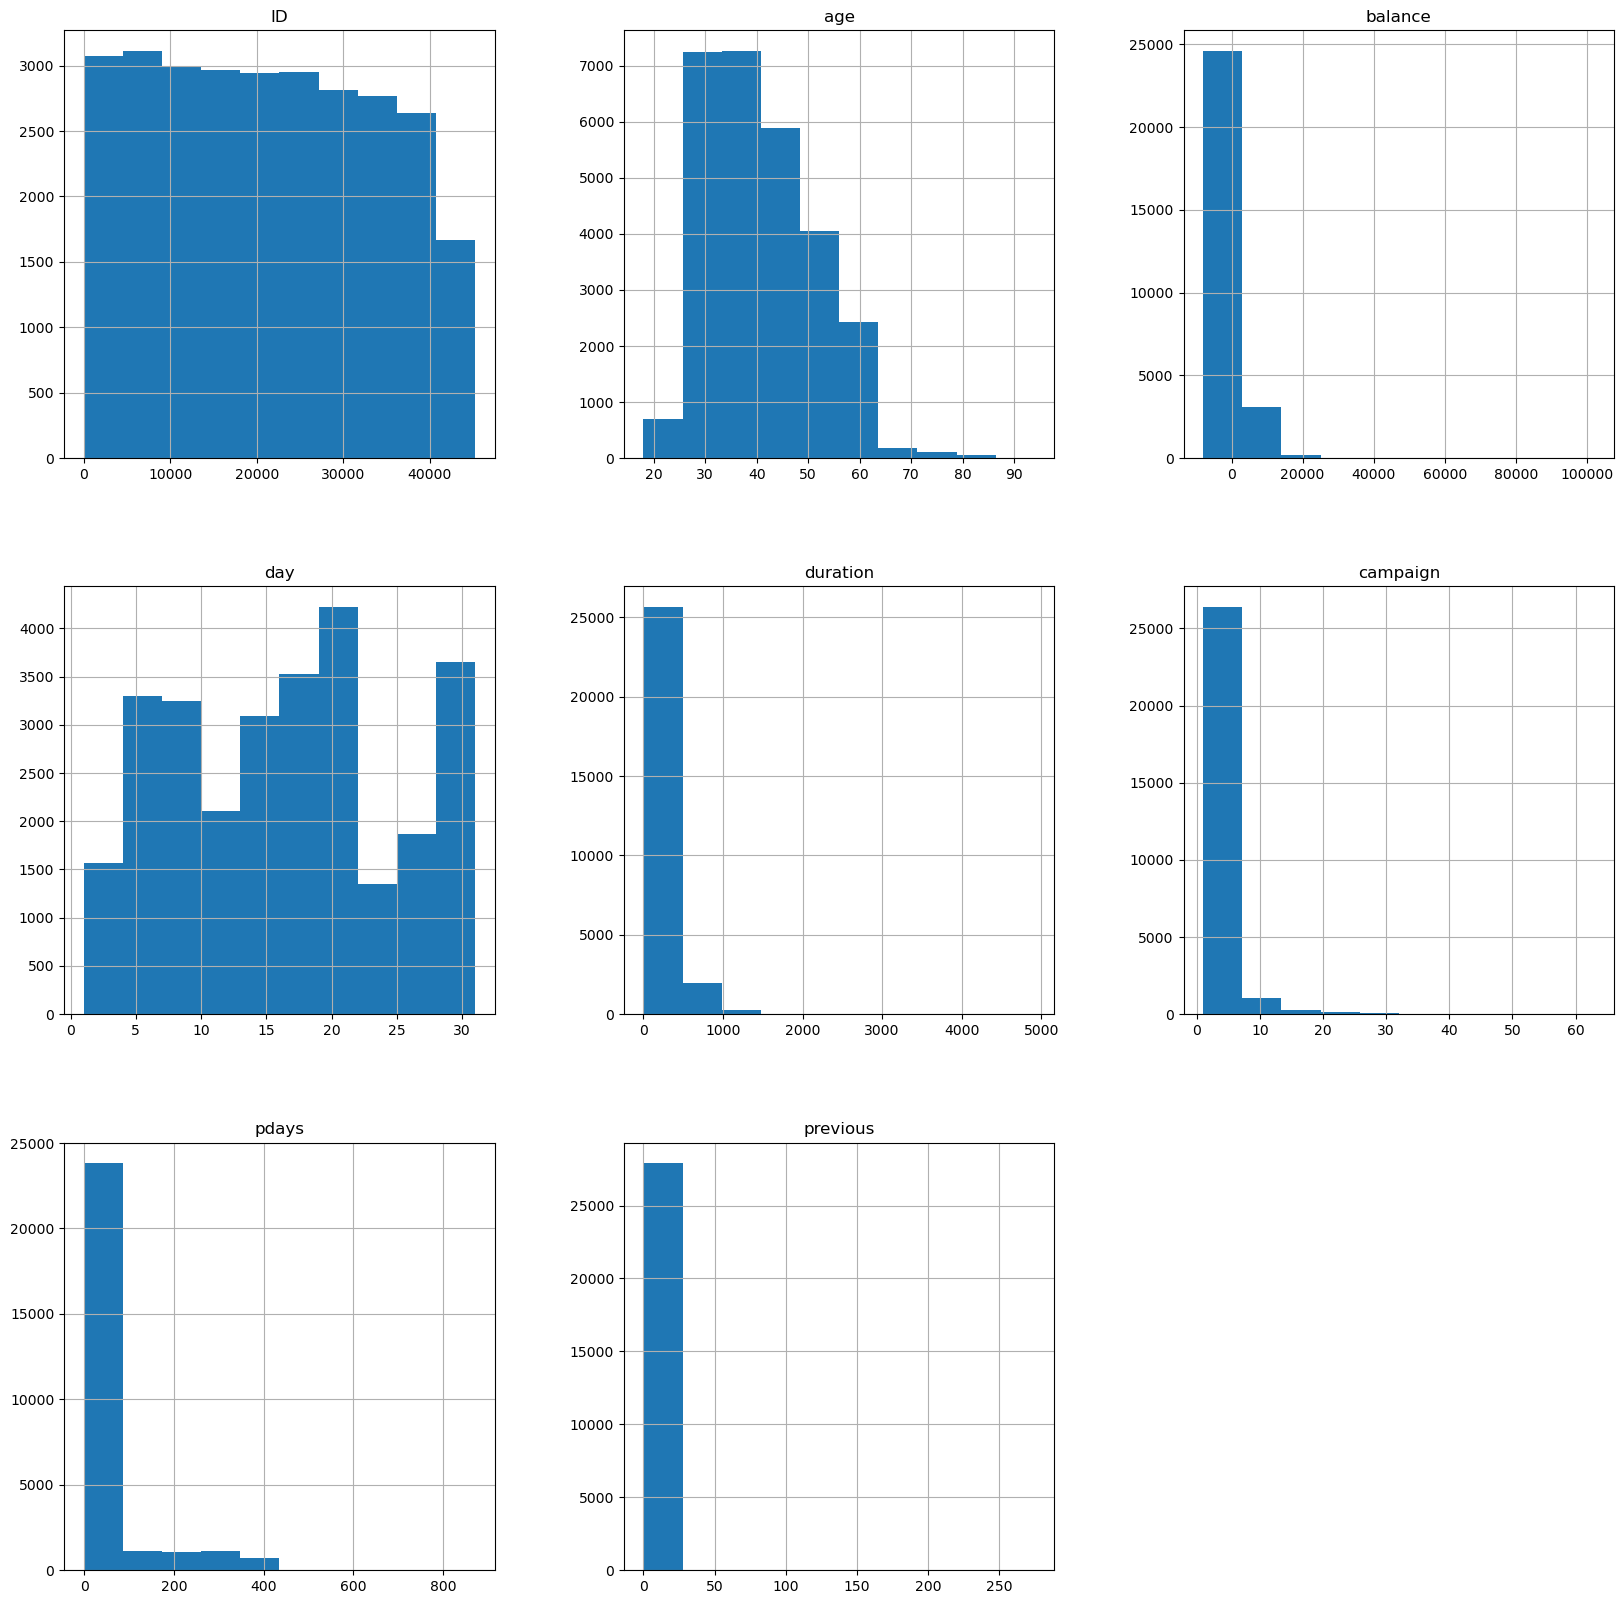

In [24]:
data[data['subscribed'] == 'no'].hist(figsize = (20,20))
plt.title('Client has not subscribed a term deposite')
plt.show()

In [9]:
data.columns

Index(['ID', 'age', 'job', 'marital', 'education', 'default', 'balance',
       'housing', 'loan', 'contact', 'day', 'month', 'duration', 'campaign',
       'pdays', 'previous', 'poutcome', 'subscribed'],
      dtype='object')

In [10]:
data.head(10)

,ID,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,subscribed
0,26110,56,admin.,married,unknown,no,1933,no,no,telephone,19,nov,44,2,-1,0,unknown,no
1,40576,31,unknown,married,secondary,no,3,no,no,cellular,20,jul,91,2,-1,0,unknown,no
2,15320,27,services,married,secondary,no,891,yes,no,cellular,18,jul,240,1,-1,0,unknown,no
3,43962,57,management,divorced,tertiary,no,3287,no,no,cellular,22,jun,867,1,84,3,success,yes
4,29842,31,technician,married,secondary,no,119,yes,no,cellular,4,feb,380,1,-1,0,unknown,no
5,29390,33,management,single,tertiary,no,0,yes,no,cellular,2,feb,116,3,-1,0,unknown,no
6,40444,56,retired,married,secondary,no,1044,no,no,telephone,3,jul,353,2,-1,0,unknown,yes
7,40194,50,technician,single,secondary,no,1811,no,no,cellular,8,jun,97,4,-1,0,unknown,no
8,29824,45,blue-collar,divorced,secondary,no,1951,yes,no,cellular,4,feb,692,1,-1,0,unknown,no
9,44676,35,admin.,married,secondary,no,1204,no,no,cellular,3,sep,789,2,-1,0,unknown,no


In [11]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 31647 entries, 0 to 31646
Data columns (total 18 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   ID          31647 non-null  int64 
 1   age         31647 non-null  int64 
 2   job         31647 non-null  object
 3   marital     31647 non-null  object
 4   education   31647 non-null  object
 5   default     31647 non-null  object
 6   balance     31647 non-null  int64 
 7   housing     31647 non-null  object
 8   loan        31647 non-null  object
 9   contact     31647 non-null  object
 10  day         31647 non-null  int64 
 11  month       31647 non-null  object
 12  duration    31647 non-null  int64 
 13  campaign    31647 non-null  int64 
 14  pdays       31647 non-null  int64 
 15  previous    31647 non-null  int64 
 16  poutcome    31647 non-null  object
 17  subscribed  31647 non-null  object
dtypes: int64(8), object(10)
memory usage: 4.3+ MB


In [12]:
data.isnull().sum()

ID            0
age           0
job           0
marital       0
education     0
default       0
balance       0
housing       0
loan          0
contact       0
day           0
month         0
duration      0
campaign      0
pdays         0
previous      0
poutcome      0
subscribed    0
dtype: int64

In [13]:
num_col = [i for i in data.columns if data[i].dtypes == 'int64']
num_col

['ID', 'age', 'balance', 'day', 'duration', 'campaign', 'pdays', 'previous']

In [14]:
char_col = [i for i in data.columns if data[i].dtypes == 'object']
char_col

['job',
 'marital',
 'education',
 'default',
 'housing',
 'loan',
 'contact',
 'month',
 'poutcome',
 'subscribed']

In [15]:
data1 = data.copy()

In [16]:
data1.corr()

,ID,age,balance,day,duration,campaign,pdays,previous
ID,1.000000,0.013337,0.067897,-0.063399,0.007183,-0.103508,0.436148,0.254476
age,0.013337,1.000000,0.103245,-0.011056,-0.003870,0.005733,-0.021947,0.005761
balance,0.067897,0.103245,1.000000,0.003461,0.024274,-0.012032,0.001789,0.013843
day,-0.063399,-0.011056,0.003461,1.000000,-0.032288,0.159168,-0.087626,-0.048752
duration,0.007183,-0.003870,0.024274,-0.032288,1.000000,-0.080305,0.000529,0.001783
campaign,-0.103508,0.005733,-0.012032,0.159168,-0.080305,1.000000,-0.087570,-0.033151
pdays,0.436148,-0.021947,0.001789,-0.087626,0.000529,-0.087570,1.000000,0.428938
previous,0.254476,0.005761,0.013843,-0.048752,0.001783,-0.033151,0.428938,1.000000


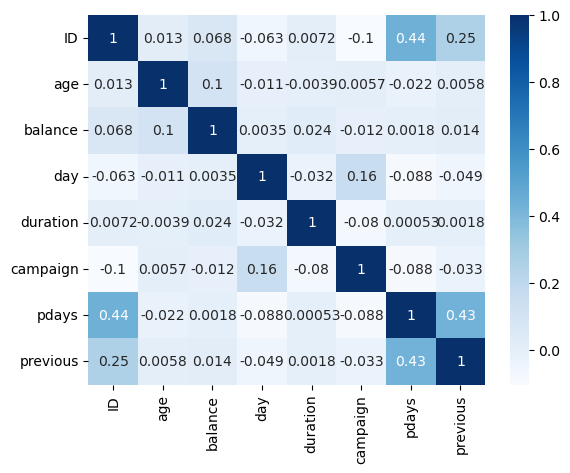

In [17]:
sns.heatmap(data1.corr(),annot = True,cmap = 'Blues')
plt.show()

### Data Preprocessing

In [25]:
data1.head()

,ID,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,subscribed
0,26110,56,admin.,married,unknown,no,1933,no,no,telephone,19,nov,44,2,-1,0,unknown,no
1,40576,31,unknown,married,secondary,no,3,no,no,cellular,20,jul,91,2,-1,0,unknown,no
2,15320,27,services,married,secondary,no,891,yes,no,cellular,18,jul,240,1,-1,0,unknown,no
3,43962,57,management,divorced,tertiary,no,3287,no,no,cellular,22,jun,867,1,84,3,success,yes
4,29842,31,technician,married,secondary,no,119,yes,no,cellular,4,feb,380,1,-1,0,unknown,no


In [26]:
from sklearn.preprocessing import LabelEncoder

In [27]:
le = LabelEncoder()

In [28]:
data2 = data1.copy()
data2['job'] = le.fit_transform(data2['job'])
data2['marital']=le.fit_transform(data2['marital'])
data2['education']=le.fit_transform(data2['education'])
data2['default']=le.fit_transform(data2['default'])
data2['housing']=le.fit_transform(data2['housing'])
data2['loan']=le.fit_transform(data2['loan'])
data2['contact']=le.fit_transform(data2['contact'])
data2['month']=le.fit_transform(data2['month'])
data2['poutcome']=le.fit_transform(data2['poutcome'])
data2['subscribed']=le.fit_transform(data2['subscribed'])

In [29]:
data2.head()

,ID,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,subscribed
0,26110,56,0,1,3,0,1933,0,0,1,19,9,44,2,-1,0,3,0
1,40576,31,11,1,1,0,3,0,0,0,20,5,91,2,-1,0,3,0
2,15320,27,7,1,1,0,891,1,0,0,18,5,240,1,-1,0,3,0
3,43962,57,4,0,2,0,3287,0,0,0,22,6,867,1,84,3,2,1
4,29842,31,9,1,1,0,119,1,0,0,4,3,380,1,-1,0,3,0


'pdays' column indicates the number of days that passed by after the client was last contacted from a previous campaign (numeric; 999 means client was not previously contacted). If the value of 'pdays' is '-1', if so we will associate that with a value of 0

In [30]:
data2[data2['pdays'] == -1]['pdays'].count()

25924

In [31]:
data2.shape

(31647, 18)

In [35]:
# Letschange the values in the pdays column
data3 = data2.copy()
for i in data3['pdays']:
    if i == -1:
        data3['pdays'].replace(i,0,inplace = True)
    else :
        data3['pdays'].replace(i,1,inplace = True)


In [36]:
data3.dtypes

ID            int64
age           int64
job           int32
marital       int32
education     int32
default       int32
balance       int64
housing       int32
loan          int32
contact       int32
day           int64
month         int32
duration      int64
campaign      int64
pdays         int64
previous      int64
poutcome      int32
subscribed    int32
dtype: object

Now we have all values in numbers.

seperation the data as inpute 'x' and target variable 'y'

In [39]:
#but we dont need id column 
# data3.drop('ID',axis = 1 ,inplace = True)

In [40]:
data3.head()

,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,subscribed
0,56,0,1,3,0,1933,0,0,1,19,9,44,2,1,0,3,0
1,31,11,1,1,0,3,0,0,0,20,5,91,2,1,0,3,0
2,27,7,1,1,0,891,1,0,0,18,5,240,1,1,0,3,0
3,57,4,0,2,0,3287,0,0,0,22,6,867,1,1,3,2,1
4,31,9,1,1,0,119,1,0,0,4,3,380,1,1,0,3,0


In [41]:
data3.shape

(31647, 17)

In [43]:
x = data3.iloc[:,:-1]

In [44]:
y = data3['subscribed']

In [45]:
x.head(3)

,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome
0,56,0,1,3,0,1933,0,0,1,19,9,44,2,1,0,3
1,31,11,1,1,0,3,0,0,0,20,5,91,2,1,0,3
2,27,7,1,1,0,891,1,0,0,18,5,240,1,1,0,3


In [47]:
y.head(4)

0    0
1    0
2    0
3    1
Name: subscribed, dtype: int32

In [48]:
print(x.shape,y.shape)


(31647, 16) (31647,)


In [49]:
#importing the testiong data to test the model
test_data = pd.read_csv('termdeposit_test.csv')

In [50]:
test_data.shape 

(13564, 17)

In [51]:
test_data.head()

,ID,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome
0,38441,32,services,married,secondary,no,118,yes,no,cellular,15,may,20,6,-1,0,unknown
1,40403,78,retired,divorced,primary,no,2787,no,no,telephone,1,jul,372,1,-1,0,unknown
2,3709,31,self-employed,single,tertiary,no,144,yes,no,unknown,16,may,676,1,-1,0,unknown
3,37422,57,services,single,primary,no,3777,yes,no,telephone,13,may,65,2,-1,0,unknown
4,12527,45,blue-collar,divorced,secondary,no,-705,no,yes,unknown,3,jul,111,1,-1,0,unknown


In [52]:
test_data1 = test_data.copy()
test_data1.drop('ID',axis = 1, inplace = True)

In [53]:
test_data1.shape 

(13564, 16)

In [55]:
test_data1.isnull().sum()

age          0
job          0
marital      0
education    0
default      0
balance      0
housing      0
loan         0
contact      0
day          0
month        0
duration     0
campaign     0
pdays        0
previous     0
poutcome     0
dtype: int64

In [56]:
test_data1.dtypes

age           int64
job          object
marital      object
education    object
default      object
balance       int64
housing      object
loan         object
contact      object
day           int64
month        object
duration      int64
campaign      int64
pdays         int64
previous      int64
poutcome     object
dtype: object

In [58]:
td = test_data1.copy()
td['job'] = le.fit_transform(td['job'])
td['marital']=le.fit_transform(td['marital'])
td['education']=le.fit_transform(td['education'])
td['default']=le.fit_transform(td['default'])
td['housing']=le.fit_transform(td['housing'])
td['loan']=le.fit_transform(td['loan'])
td['contact']=le.fit_transform(td['contact'])
td['month']=le.fit_transform(td['month'])
td['poutcome']=le.fit_transform(td['poutcome'])

In [59]:
td1 = td.copy()
for i in td1['pdays']:
    if i == -1:
        td1['pdays'].replace(i,0,inplace = True)
    else :
        td1['pdays'].replace(i,1,inplace = True)

In [60]:
td1.head(10)

,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome
0,32,7,1,1,0,118,1,0,0,15,8,20,6,1,0,3
1,78,5,0,0,0,2787,0,0,1,1,5,372,1,1,0,3
2,31,6,2,2,0,144,1,0,2,16,8,676,1,1,0,3
3,57,7,2,0,0,3777,1,0,1,13,8,65,2,1,0,3
4,45,1,0,1,0,-705,0,1,2,3,5,111,1,1,0,3
5,32,4,2,2,0,0,1,0,0,22,5,455,2,1,0,3
6,33,1,2,1,0,307,1,0,2,5,8,309,2,1,0,3
7,37,4,1,1,0,341,0,0,2,3,6,120,2,1,0,3
8,36,9,0,2,0,1381,0,0,0,2,7,149,1,1,0,3
9,50,0,2,0,0,181,1,0,0,15,8,119,4,1,3,0


In [61]:
# train test split
from sklearn.model_selection import train_test_split

In [63]:
x_train,x_test,y_train,y_test = train_test_split(x,y,test_size = 0.2,random_state = 32)

In [64]:
print(x_train.shape,x_test.shape,y_train.shape,y_test.shape)

(25317, 16) (6330, 16) (25317,) (6330,)


In [65]:
#creating the model
x1 = x.copy()

In [66]:
from sklearn.naive_bayes import GaussianNB
from sklearn.neighbors import KNeighborsClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import confusion_matrix,accuracy_score,classification_report,roc_auc_score

In [68]:
models  = {
    "GaussianNB":GaussianNB(),
    "LogisticRegression":LogisticRegression(),
    "Random Forest":RandomForestClassifier(),
    "Decision Tree":DecisionTreeClassifier(),
    "SVC":SVC(),
}
for i in range(len(list(models))):
  #training the model
    model = list(models.values())[i]
    model.fit(x_train,y_train)
  #prediction   
    y_train_pred = model.predict(x_train)
    y_test_pred = model.predict(x_test)
    
  #training performance
    model_train_accuracy = accuracy_score(y_train,y_train_pred)
    model_train_roc_auc_score = roc_auc_score(y_train,y_train_pred)
    
  #testing performance
    model_test_accuracy = accuracy_score(y_test,y_test_pred)
    model_test_roc_auc_score = roc_auc_score(y_test,y_test_pred)
    
    
    
    print(list(models.keys())[i])
    
    print("* Model performace for training set")
    print("Accuracy Score :",model_train_accuracy)
    print("roc_auc_score : ",model_train_roc_auc_score)
  
    
    
    print("\n")
    print("* Model performace for testing set ")
    print("Accuracy Score :",model_test_accuracy)
    print("roc_auc_score : ",model_test_roc_auc_score)
    print("Confusion matrix \n",confusion_matrix(y_test,y_test_pred))
    print(confusion_matrix(y_test,y_test_pred))
    print('\n')
    print(classification_report(y_test,y_test_pred))
    
    print(" --------------------------------------------------- ")
    print("\n")

GaussianNB
* Model performace for training set
Accuracy Score : 0.8764861555476557
roc_auc_score :  0.682517914285722


* Model performace for testing set 
Accuracy Score : 0.875829383886256
roc_auc_score :  0.6848095583532335
Confusion matrix 
 [[5233  388]
 [ 398  311]]
[[5233  388]
 [ 398  311]]


              precision    recall  f1-score   support

           0       0.93      0.93      0.93      5621
           1       0.44      0.44      0.44       709

    accuracy                           0.88      6330
   macro avg       0.69      0.68      0.69      6330
weighted avg       0.88      0.88      0.88      6330

 --------------------------------------------------- 


LogisticRegression
* Model performace for training set
Accuracy Score : 0.8862819449381838
roc_auc_score :  0.5785499057015725


* Model performace for testing set 
Accuracy Score : 0.8906793048973144
roc_auc_score :  0.5865569598591218
Confusion matrix 
 [[5500  121]
 [ 571  138]]
[[5500  121]
 [ 571  138]]


   

Here the RandomForestClassifier working good with accuracy 0.902

In [69]:
from sklearn.metrics import roc_curve

In [75]:
# testing data
rf = RandomForestClassifier()
rf.fit(x_train,y_train)
p = rf.predict(td1)
p

array([0, 0, 0, ..., 0, 1, 0])

In [84]:
#cross val score
from sklearn.model_selection import cross_val_score
score1 = cross_val_score(rf,x,y,cv = 5)
print(score1.mean())
print(score1.std())

0.9022971516804837
0.0012353666889673965


In [85]:
import joblib
joblib.dump(rf,"bank_marketing_rf.obj")

['bank_marketing_rf.obj']